In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# df_1=pd.read_csv('/content/output.csv')
# df_2=pd.read_csv('/content/output 2.csv')

In [ ]:
# df_1.tail()

In [ ]:
# df_2.tail()

In [ ]:
# df_new = pd.concat([df_1, df_2], ignore_index=True)


In [ ]:
df_new=pd.read_excel('/content/updated songs-1.xlsx')

In [ ]:
print(df_new.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       ...
       'artistPopularity19', 'artistFollowers19', 'artistId20', 'artistName20',
       'artistPopularity20', 'artistFollowers20', 'artistId21', 'artistName21',
       'artistPopularity21', 'artistFollowers21'],
      dtype='object', length=114)


In [ ]:
# df_new.to_excel('Hit and Flop.xlsx',index=False)

In [ ]:
df = df_new.drop_duplicates(subset=['trackId'])


In [ ]:
df['artist1_genre1'].fillna('sinhala pop', inplace=True)

In [ ]:
# Add the "trending" column based on the condition
df['trending'] = df['popularity'].apply(lambda x: 'hit' if x >= 35 else 'flop')


In [ ]:
df.dropna(subset=['trackId'], inplace=True)

In [ ]:
df_new=df.copy()

In [ ]:
columns_list = df_new.columns.tolist()
columns_list

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'duration_ms',
 'time_signature',
 'trackId',
 'trackName',
 'popularity',
 'artistId1',
 'artistName1',
 'artistPopularity1',
 'artistFollowers1',
 'view',
 'NO of Tiktok  videos',
 'artist1_genre1',
 'artist1_genre2',
 'artistId2',
 'artistName2',
 'artistPopularity2',
 'artistFollowers2',
 'artist2_genre2',
 'artistId3',
 'artistName3',
 'artistPopularity3',
 'artistFollowers3',
 'artist3_genre3',
 'artist4_genre4',
 'artist5_genre5',
 'artist1_genre3',
 'artistId4',
 'artistName4',
 'artistPopularity4',
 'artistFollowers4',
 'artistId5',
 'artistName5',
 'artistPopularity5',
 'artistFollowers5',
 'artistId6',
 'artistName6',
 'artistPopularity6',
 'artistFollowers6',
 'artistId7',
 'artistName7',
 'artistPopularity7',
 'artistFollowers7',
 'artist1_genre4',
 'artist1_genre5',
 'artist6_genre6',
 'artist7_genre7',
 'artistId8',


In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame named df
# columns_to_drop = ["type","trackId", "trackName", "artistId1", "artistName1", "artistId2", "artistName2", "artistId3","artistName3", "artistId4", "artistName4", "artistId5","artistName5", "artistId6", "artistName6", "artistId7", "artistName7", 'artistId3', 'artistName3', 'artistPopularity3', 'artistFollowers3',
#     'artist3_genre3', 'artist4_genre4', 'artist5_genre5',
#     'artist1_genre3', 'artistId4', 'artistName4', 'artistPopularity4',
#     'artistFollowers4', 'artistId5', 'artistName5', 'artistPopularity5',
#     'artistFollowers5', 'artistId6', 'artistName6', 'artistPopularity6',
#     'artistFollowers6', 'artistId7', 'artistName7', 'artistPopularity7',
#     'artistFollowers7', 'artist1_genre4', 'artist1_genre5',
#     'artist6_genre6', 'artist7_genre7','Tiktok viewCount','popularity']
# df_new.drop(columns=columns_to_drop, inplace=True)



In [ ]:
df_new.dropna(subset='view',how='any',inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Columns: 115 entries, danceability to trending
dtypes: float64(53), int64(7), object(55)
memory usage: 696.9+ KB


In [ ]:
columns_to_keep = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
    'artistPopularity1', 'artistFollowers1', 'artist1_genre1', 'artist1_genre2',
    'artistPopularity2', 'artistFollowers2', 'artist2_genre2', 'view', 'trending', 'NO of Tiktok  videos'
]

# Keep only the specified columns and drop the rest
df_new = df_new.loc[:, columns_to_keep]

In [ ]:
# Assuming 'df_new' is your DataFrame and you want to convert specific columns
columns_to_convert = ['view', 'NO of Tiktok  videos']  # Replace these with your column names

# Convert specified columns from string to float
df_new[columns_to_convert] = df_new[columns_to_convert].astype(float)

In [ ]:

min_value = df_new['view'].min()
min_value = df_new['view'].max()
max_value = df_new['NO of Tiktok  videos'].max()
max_value = df_new['NO of Tiktok  videos'].min()

# # Generate random numbers within the range of min and max values
# random_value_view = np.random.uniform(low=min_value, high=max_value, size=df['view'].isnull().sum())
# random_values_tiktok = np.random.uniform(low=min_value, high=max_value, size=df['NO of Tiktok  videos'].isnull().sum())



In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          769 non-null    float64
 1   energy                769 non-null    float64
 2   key                   769 non-null    int64  
 3   loudness              769 non-null    float64
 4   mode                  769 non-null    int64  
 5   speechiness           769 non-null    float64
 6   acousticness          769 non-null    float64
 7   instrumentalness      769 non-null    float64
 8   liveness              769 non-null    float64
 9   valence               769 non-null    float64
 10  tempo                 769 non-null    float64
 11  duration_ms           769 non-null    int64  
 12  time_signature        769 non-null    int64  
 13  artistPopularity1     769 non-null    int64  
 14  artistFollowers1      769 non-null    int64  
 15  artist1_genre1        7

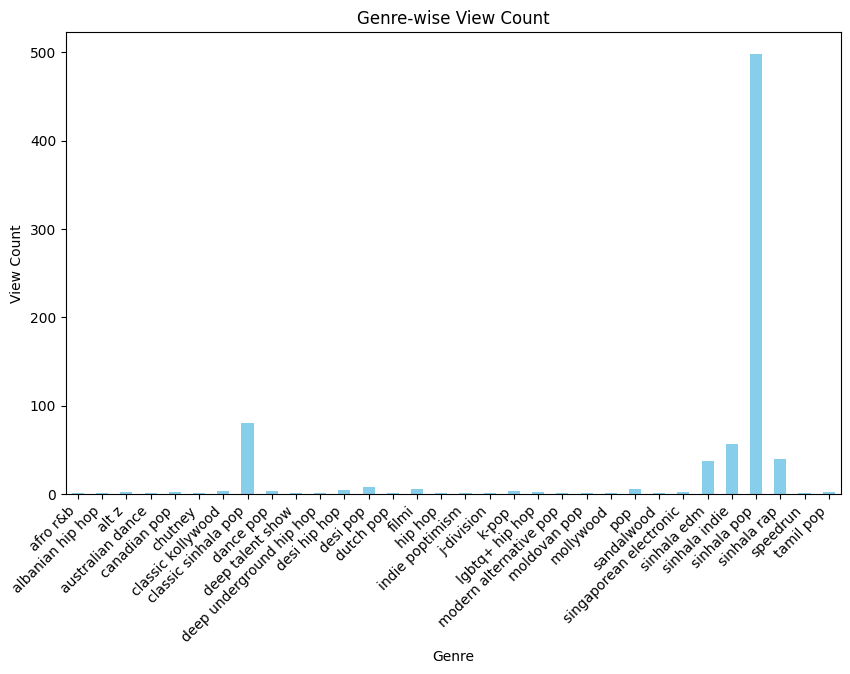

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'genre' and sum the 'view_count' for each genre
genre_counts = df_new.groupby('artist1_genre1')['view'].count()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre-wise View Count')
plt.xlabel('Genre')
plt.ylabel('View Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt


# # Group by 'genre' and sum the 'view_count' for each genre
# genre_counts = df_new.groupby('artist1_genre1')['NO of Tiktok  videos'].sum()

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))
# genre_counts.plot(kind='bar', color='skyblue')
# plt.title('Genre-wise View Count')
# plt.xlabel('Genre')
# plt.ylabel('View Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()


In [ ]:
# # Replace null values with random numbers
# null_indices = df_new[df_new['view'].isnull()].index
# df_new.loc[null_indices, 'view'] = random_value_view

In [ ]:
# null_indices = df_new[df_new['NO of Tiktok  videos'].isnull()].index
# df_new.loc[null_indices, 'NO of Tiktok  videos'] = random_values_tiktok

In [ ]:
df_new.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artistPopularity1,artistFollowers1,artist1_genre1,artist1_genre2,artistPopularity2,artistFollowers2,artist2_genre2,view,trending,NO of Tiktok videos
764,0.851,0.615,0,-9.563,1,0.2170,0.557,0.00000,0.0866,0.668,95.969,227091,4,33,77789,sinhala pop,NaN,9.0,100.0,NaN,265262.0,flop,13600.0
765,0.633,0.598,5,-7.959,1,0.0298,0.630,0.00935,0.0686,0.311,114.876,241565,1,0,27,sinhala pop,NaN,NaN,NaN,NaN,1716.0,flop,0.0
766,0.531,0.570,3,-7.916,0,0.0295,0.588,0.00000,0.0846,0.219,112.210,302079,3,43,169382,sinhala indie,NaN,37.0,172254.0,sinhala pop,872986.0,flop,247.0
767,0.790,0.431,6,-14.289,0,0.1500,0.102,0.27700,0.1390,0.381,85.004,207529,4,39,122044,sinhala pop,NaN,40.0,53537.0,sinhala pop,1931643.0,flop,1254.0
768,0.615,0.489,2,-8.800,1,0.0343,0.132,0.39300,0.0866,0.137,91.997,211304,4,0,58,sinhala pop,NaN,NaN,NaN,NaN,2318.0,flop,3.0


In [ ]:
df_new['artist1_genre2'].fillna('No_Genre', inplace=True)
df_new['artist2_genre2'].fillna('No_Genre', inplace=True)


df_new['artistPopularity2'].fillna(0, inplace=True)
df_new['artistFollowers2'].fillna(0, inplace=True)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          769 non-null    float64
 1   energy                769 non-null    float64
 2   key                   769 non-null    int64  
 3   loudness              769 non-null    float64
 4   mode                  769 non-null    int64  
 5   speechiness           769 non-null    float64
 6   acousticness          769 non-null    float64
 7   instrumentalness      769 non-null    float64
 8   liveness              769 non-null    float64
 9   valence               769 non-null    float64
 10  tempo                 769 non-null    float64
 11  duration_ms           769 non-null    int64  
 12  time_signature        769 non-null    int64  
 13  artistPopularity1     769 non-null    int64  
 14  artistFollowers1      769 non-null    int64  
 15  artist1_genre1        7

In [ ]:
# categorical_columns = [
#     "artist1_genre1",
#     "artist1_genre2",
#     "artist2_genre2"
# ]

# numeric_columns = [
#     "danceability",
#     "energy",
#     "key",
#     "loudness",
#     "mode",
#     "speechiness",
#     "acousticness",
#     "instrumentalness",
#     "liveness",
#     "valence",
#     "tempo",
#     "duration_ms",
#     "time_signature",
#     "popularity",
#     "artistPopularity1",
#     "artistFollowers1",
#     "artistPopularity2",
#     "artistFollowers2"
# ]



In [ ]:
categorical_columns = ["artist1_genre1", "artist1_genre2", "artist2_genre2" ,"trending"]
numeric_columns = [col for col in df_new.columns if col not in categorical_columns and col != "view" and col != "NO of Tiktok  videos"]


In [ ]:
categorical_columns

['artist1_genre1', 'artist1_genre2', 'artist2_genre2', 'trending']

In [ ]:
numeric_columns

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'artistPopularity1',
 'artistFollowers1',
 'artistPopularity2',
 'artistFollowers2']

In [ ]:
df_new.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artistPopularity1,artistFollowers1,artist1_genre1,artist1_genre2,artistPopularity2,artistFollowers2,artist2_genre2,view,trending,NO of Tiktok videos
0,0.871,0.525,0,-10.682,1,0.2410,0.4330,0.000092,0.1690,0.617,92.006,227934,4,42,113161,sinhala pop,sinhala rap,0.0,0.0,No_Genre,1022751.0,hit,36300.0
1,0.840,0.582,10,-9.244,0,0.2350,0.4980,0.000167,0.1100,0.580,91.000,256648,4,37,34492,sinhala pop,No_Genre,43.0,157260.0,sinhala rap,924873.0,hit,54600.0
2,0.724,0.734,6,-7.305,0,0.1280,0.0925,0.001950,0.0746,0.879,102.017,245998,4,36,22424,classic sinhala pop,No_Genre,31.0,320.0,sinhala indie,851907.0,hit,55300.0
3,0.724,0.715,0,-8.434,0,0.0448,0.4210,0.007000,0.1930,0.648,95.019,238720,4,39,85465,sinhala pop,sinhala rap,0.0,0.0,No_Genre,2279288.0,hit,4245.0
4,0.495,0.443,11,-12.275,0,0.0340,0.4510,0.000021,0.1300,0.292,88.646,220689,4,38,27870,sinhala indie,sinhala pop,0.0,0.0,No_Genre,528071.0,hit,195.0
5,0.673,0.673,5,-6.788,0,0.0462,0.2390,0.000002,0.1320,0.364,95.313,183250,4,43,157260,sinhala rap,No_Genre,33.0,8841.0,sinhala rap,721951.0,hit,132.0
6,0.735,0.609,4,-6.798,0,0.0564,0.7250,0.081600,0.1520,0.403,91.974,211304,4,28,12191,sinhala pop,No_Genre,0.0,0.0,No_Genre,1822320.0,hit,13700.0
7,0.730,0.340,7,-11.832,0,0.0440,0.7630,0.434000,0.1010,0.275,133.981,159855,4,39,22879,sinhala pop,No_Genre,0.0,0.0,No_Genre,318305.0,hit,1917.0
8,0.684,0.626,9,-8.011,0,0.0548,0.6970,0.000003,0.1680,0.732,119.960,249533,4,36,10144,sinhala pop,No_Genre,40.0,139467.0,sinhala pop,1958287.0,hit,1519.0
9,0.757,0.533,2,-7.864,1,0.0446,0.0438,0.000005,0.2290,0.223,95.981,208000,4,39,90845,classic sinhala pop,sinhala pop,0.0,0.0,No_Genre,1803271.0,hit,20800.0


In [ ]:
# Label encoding for categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df_new[column] = label_encoder.fit_transform(df_new[column])
    label_encoders[column] = label_encoder

# Min-max scaling for numeric columns
scaler = MinMaxScaler()
df_new[numeric_columns] = scaler.fit_transform(df_new[numeric_columns])

In [ ]:
df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artistPopularity1,artistFollowers1,artist1_genre1,artist1_genre2,artistPopularity2,artistFollowers2,artist2_genre2,view,trending,NO of Tiktok videos
0,0.900135,0.517635,0.000000,0.496875,1.0,0.426262,0.439706,0.000113,0.177298,0.623946,0.270968,0.353040,0.75,0.488372,0.000981,28,10,0.000000,0.000000,0,1022751.0,1,36300.0
1,0.858300,0.580266,0.909091,0.580093,0.0,0.414432,0.505802,0.000206,0.106951,0.583964,0.264504,0.404910,0.75,0.430233,0.000299,28,0,0.483146,0.001364,16,924873.0,1,54600.0
2,0.701754,0.747281,0.545455,0.692303,0.0,0.203470,0.093462,0.002401,0.064743,0.907067,0.335289,0.385671,0.75,0.418605,0.000194,7,0,0.348315,0.000003,14,851907.0,1,55300.0
3,0.701754,0.726404,0.000000,0.626968,0.0,0.039432,0.427503,0.008621,0.205914,0.657445,0.290327,0.372524,0.75,0.453488,0.000741,28,10,0.000000,0.000000,0,2279288.0,1,4245.0
4,0.392713,0.427535,1.000000,0.404687,0.0,0.018139,0.458009,0.000025,0.130798,0.272747,0.249380,0.339952,0.75,0.441860,0.000242,27,9,0.000000,0.000000,0,528071.0,1,195.0



# PCA View

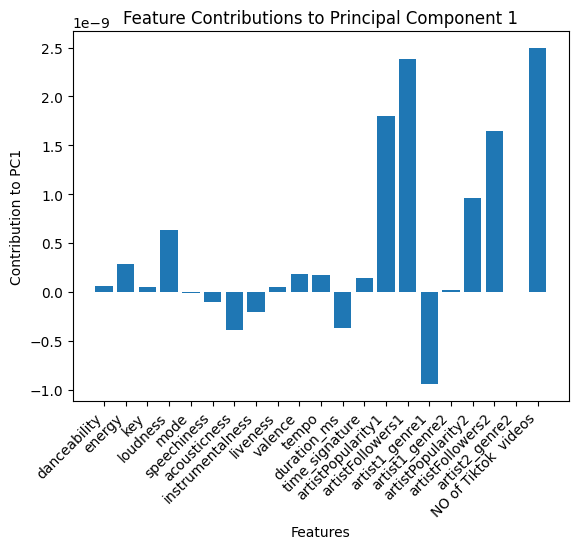

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'df' with your features and target variable
# Replace 'df' with your actual DataFrame

# Extract features and target variable
features = df_new.drop(['view', 'trending'], axis=1)  # Assuming 'view' is your target variable
target = df_new['view']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine standardized features and target variable
data_combined = np.column_stack((features_scaled, target))

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_combined)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate feature contributions to the first principal component
feature_contributions = pca.components_[0]

# Visualize feature contributions
feature_names = features.columns
plt.bar(feature_names, feature_contributions[:-1])  # Exclude the target variable from visualization
plt.xlabel('Features')
plt.ylabel('Contribution to PC1')
plt.title('Feature Contributions to Principal Component 1')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df_feature_contributions = pd.DataFrame({'Feature': feature_names, 'Contribution to PC-1': feature_contributions[:-1]})

In [ ]:
df_feature_contributions

,Feature,Contribution to PC-1
0,danceability,5.748408e-11
1,energy,2.846293e-10
2,key,5.316026e-11
3,loudness,6.371272e-10
4,mode,-1.348092e-11
5,speechiness,-9.843312e-11
6,acousticness,-3.875467e-10
7,instrumentalness,-2.061311e-10
8,liveness,4.770646e-11
9,valence,1.865072e-10


In [ ]:
df_new.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artistPopularity1,artistFollowers1,artist1_genre1,artist1_genre2,artistPopularity2,artistFollowers2,artist2_genre2,view,trending,NO of Tiktok videos
0,0.900135,0.517635,0.000000,0.496875,1.0,0.426262,0.439706,0.000113,0.177298,0.623946,0.270968,0.353040,0.75,0.488372,0.000981,28,10,0.000000,0.000000,0,1022751.0,1,36300.0
1,0.858300,0.580266,0.909091,0.580093,0.0,0.414432,0.505802,0.000206,0.106951,0.583964,0.264504,0.404910,0.75,0.430233,0.000299,28,0,0.483146,0.001364,16,924873.0,1,54600.0
2,0.701754,0.747281,0.545455,0.692303,0.0,0.203470,0.093462,0.002401,0.064743,0.907067,0.335289,0.385671,0.75,0.418605,0.000194,7,0,0.348315,0.000003,14,851907.0,1,55300.0
3,0.701754,0.726404,0.000000,0.626968,0.0,0.039432,0.427503,0.008621,0.205914,0.657445,0.290327,0.372524,0.75,0.453488,0.000741,28,10,0.000000,0.000000,0,2279288.0,1,4245.0
4,0.392713,0.427535,1.000000,0.404687,0.0,0.018139,0.458009,0.000025,0.130798,0.272747,0.249380,0.339952,0.75,0.441860,0.000242,27,9,0.000000,0.000000,0,528071.0,1,195.0


In [ ]:
df_new_scale=df_new.copy()

In [ ]:
# df_new_new_new=df_new.drop(columns=['mode', 'artist2_genre2' , 'artist1_genre1' ,'duration_ms','instrumentalness','acousticness','speechiness','mode'])

In [ ]:
# df_new_new_new.head()

# Model Development View Count

In [ ]:
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_new_scale['view_scaled'] = scaler.fit_transform(df_new_scale[['view']])

In [ ]:
X = df_new_scale.drop(columns=['view' , 'trending', 'view_scaled'])
y = df_new_scale['view_scaled']

# PCA

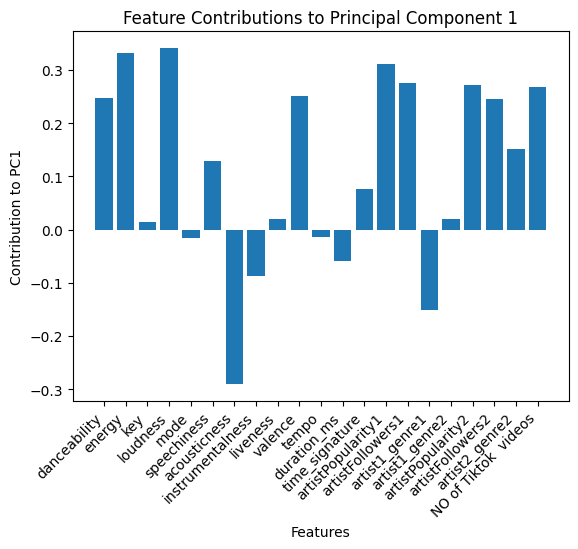

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'df' with your features and target variable
# Replace 'df' with your actual DataFrame

# Extract features and target variable
features = df_new_scale.drop(['view', 'trending','view_scaled'], axis=1)  # Assuming 'view' is your target variable
target = df_new_scale['view_scaled']

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine standardized features and target variable
data_combined = np.column_stack((features_scaled, target))

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_combined)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate feature contributions to the first principal component
feature_contributions = pca.components_[0]

# Visualize feature contributions
feature_names = features.columns
plt.bar(feature_names, feature_contributions[:-1])  # Exclude the target variable from visualization
plt.xlabel('Features')
plt.ylabel('Contribution to PC1')
plt.title('Feature Contributions to Principal Component 1')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df_feature_contributions = pd.DataFrame({'Feature': feature_names, 'Contribution to PC-1': feature_contributions[:-1]})

In [ ]:
df_feature_contributions


,Feature,Contribution to PC-1
0,danceability,0.318033
1,energy,0.408646
2,key,0.019581
3,loudness,0.396643
4,mode,-0.032456
5,speechiness,0.181263
6,acousticness,-0.348045
7,instrumentalness,-0.092176
8,liveness,0.025261
9,valence,0.313287


# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the model
smape_error = smape(y_test, rf_predictions)
print(f"Accuracy is:  {100 - smape_error}")


Accuracy is:  86.71289521929842


In [ ]:
result_df_rf = pd.DataFrame({'True Labels (y2_test)': y_test, 'Predicted Labels (y2_pred)': rf_predictions})

In [ ]:
# import numpy as np

# # Assuming result_df_rf['Predicted Labels (y2_pred)'] contains the 1D array
# predicted_labels_1d = result_df_rf['Predicted Labels (y2_pred)'].values.reshape(-1, 1)

# # Use scaler.inverse_transform with reshaped data
# result_df_rf['view_scaled_reverse'] = scaler.inverse_transform(predicted_labels_1d)


In [ ]:
# result_df_rf['view_scaled_reverse'] = result_df_rf['view_scaled_reverse'].round(2)

In [ ]:
# result_df_rf['view_scaled_reverse']=abs(result_df_rf['view_scaled_reverse'])
# result_df_rf.head()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predictions = linear_regression_model.predict(X_test)

# Evaluate the model
smape_error = smape(y_test, lr_predictions)
print(f"Accuracy is:  {100 - smape_error}")


Accuracy is:  35.09133079074523


In [ ]:
result_df_lr = pd.DataFrame({'True Labels (y2_test)': y_test, 'Predicted Labels (y2_pred)': lr_predictions})
result_df_lr.head()

,True Labels (y2_test),Predicted Labels (y2_pred)
669,-0.188284,-0.138578
324,-0.188657,-0.087779
625,-0.188472,-0.362838
691,-0.187841,-0.242808
473,-0.188657,-0.169787


In [ ]:
# import numpy as np

# # Assuming result_df_rf['Predicted Labels (y2_pred)'] contains the 1D array
# predicted_labels_1d_lr = result_df_lr['Predicted Labels (y2_pred)'].values.reshape(-1, 1)

# # Use scaler.inverse_transform with reshaped data
# result_df_lr['view_scaled_reverse'] = scaler.inverse_transform(predicted_labels_1d_lr)


In [ ]:
# result_df_lr['view_scaled_reverse']=abs(result_df_lr['view_scaled_reverse'])
# result_df_lr.head()

# XG Boost

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regression

# Create a Gradient Boosting Regressor
reg = xgb.XGBRegressor()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

print("XG Boost for Trending")
print("Accuracy:", 100 - smape(y_test, y_pred))

XG Boost for Trending
Accuracy: 87.06822752940634


In [ ]:
# result_df_xg = pd.DataFrame({'True Labels (y2_test)': y_test, 'Predicted Labels (y2_pred)': y_pred})

# import numpy as np

# # Assuming result_df_rf['Predicted Labels (y2_pred)'] contains the 1D array
# predicted_labels_1d_xg = result_df_xg['Predicted Labels (y2_pred)'].values.reshape(-1, 1)

# # Use scaler.inverse_transform with reshaped data
# result_df_xg['view_scaled_reverse'] = scaler.inverse_transform(predicted_labels_1d_xg)
# result_df_xg['view_scaled_reverse']=abs(result_df_xg['view_scaled_reverse'])


In [ ]:
# result_df_xg

# Reg Regresssion

In [ ]:
from sklearn.linear_model import Ridge
# Create a Ridge regression model
ridge_model = Ridge()

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
smape_error = smape(y_test, ridge_predictions)
print(f"Accuracy is:  {100 - smape_error}")


Accuracy is:  19.252345179973148


In [ ]:
# result_df_reg = pd.DataFrame({'True Labels (y2_test)': y_test, 'Predicted Labels (y2_pred)': ridge_predictions})

# import numpy as np

# # Assuming result_df_rf['Predicted Labels (y2_pred)'] contains the 1D array
# predicted_labels_1d_xg = result_df_reg['Predicted Labels (y2_pred)'].values.reshape(-1, 1)

# # Use scaler.inverse_transform with reshaped data
# result_df_reg['view_scaled_reverse'] = scaler.inverse_transform(predicted_labels_1d_xg)


In [ ]:
# result_df_reg['view_scaled_reverse']=abs(result_df_reg['view_scaled_reverse'])

In [ ]:
# result_df_reg

# PCV - Trending

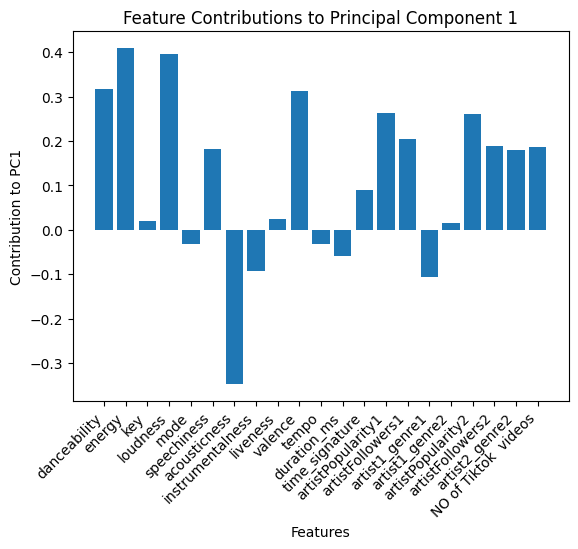

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'df' with your features and target variable
# Replace 'df' with your actual DataFrame

# Extract features and target variable
features = df_new.drop(['view', 'trending'], axis=1)  # Assuming 'view' is your target variable
target = df_new['trending']


# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine standardized features and target variable
data_combined = np.column_stack((features_scaled, target))

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_combined)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate feature contributions to the first principal component
feature_contributions = pca.components_[0]

# Visualize feature contributions
feature_names = features.columns
plt.bar(feature_names, feature_contributions[:-1])  # Exclude the target variable from visualization
plt.xlabel('Features')
plt.ylabel('Contribution to PC1')
plt.title('Feature Contributions to Principal Component 1')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df_feature_contributions = pd.DataFrame({'Feature': feature_names, 'Contribution to PC-1': feature_contributions[:-1]})

In [ ]:
df_feature_contributions

,Feature,Contribution to PC-1
0,danceability,0.318033
1,energy,0.408646
2,key,0.019581
3,loudness,0.396643
4,mode,-0.032456
5,speechiness,0.181263
6,acousticness,-0.348045
7,instrumentalness,-0.092176
8,liveness,0.025261
9,valence,0.313287


# Model Training

In [ ]:
df_ml=df_new.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          769 non-null    float64
 1   energy                769 non-null    float64
 2   key                   769 non-null    float64
 3   loudness              769 non-null    float64
 4   mode                  769 non-null    float64
 5   speechiness           769 non-null    float64
 6   acousticness          769 non-null    float64
 7   instrumentalness      769 non-null    float64
 8   liveness              769 non-null    float64
 9   valence               769 non-null    float64
 10  tempo                 769 non-null    float64
 11  duration_ms           769 non-null    float64
 12  time_signature        769 non-null    float64
 13  artistPopularity1     769 non-null    float64
 14  artistFollowers1      769 non-null    float64
 15  artist1_genre1        7

# Error Measure

In [ ]:
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

#  Train and Test

In [ ]:
X = df_ml.drop(columns=['view' , 'trending'])
y = df_ml['view']
y2 = df_ml['trending']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          769 non-null    float64
 1   energy                769 non-null    float64
 2   key                   769 non-null    float64
 3   loudness              769 non-null    float64
 4   mode                  769 non-null    float64
 5   speechiness           769 non-null    float64
 6   acousticness          769 non-null    float64
 7   instrumentalness      769 non-null    float64
 8   liveness              769 non-null    float64
 9   valence               769 non-null    float64
 10  tempo                 769 non-null    float64
 11  duration_ms           769 non-null    float64
 12  time_signature        769 non-null    float64
 13  artistPopularity1     769 non-null    float64
 14  artistFollowers1      769 non-null    float64
 15  artist1_genre1        7

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)


# SVM

In [ ]:
# Regression

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)


In [ ]:
svm_model = SVC(kernel='sigmoid', C=1.0)

In [ ]:
svm_model.fit(X_train, y2_train)

SVC(kernel='sigmoid')

In [ ]:
svm_predictions = svm_model.predict(X_test)

In [ ]:
result_df = pd.DataFrame({'True Labels (y2_test)': y2_test, 'Predicted Labels (y2_pred)': svm_predictions})


In [ ]:
print('SVM Confussion Matrix')
print(classification_report(y2_test,svm_predictions))

SVM Confussion Matrix
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       102
           1       0.68      0.37      0.47        52

    accuracy                           0.73       154
   macro avg       0.71      0.64      0.65       154
weighted avg       0.72      0.73      0.70       154



In [ ]:
print('SVM Accuracy: ', accuracy_score(y2_test, svm_predictions))


SVM Accuracy:  0.7272727272727273


In [ ]:
result_df.head(20)

,True Labels (y2_test),Predicted Labels (y2_pred)
669,0,0
324,0,0
625,0,0
691,0,0
473,0,0
204,1,0
97,0,0
336,0,0
568,1,0
148,0,0


In [ ]:
# from matplotlib import pyplot as plt
# _df_1['Predicted Labels (y_pred)'].plot(kind='hist', bins=20, title='Predicted Labels (y_pred)')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
smape_error = smape(y2_test, svm_predictions)
print(f"Accuracy is:  {100 - smape_error}")

Accuracy is:  45.45454545454545


## Decision Tree




In [ ]:
# # prompt: genarate me decision tree model for the classification and get the accuracy using  Confusion Matrix - Evaluation

# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.metrics import classification_report
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Create a decision tree classifier
# clf = DecisionTreeClassifier()
# # Train the classifier
# clf.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred = clf.predict(X_test)
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# # Generate a confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion matrix:")
# print(cm)
# # Generate a classification report
# cr = classification_report(y_test, y_pred)
# print("Classification report:")
# print(cr)


# Random Forrest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# # Regression

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)

# random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fit the model on the training data
# random_forest_model.fit(X_train, y_train)

# # Make predictions on the test data
# rf_predictions = random_forest_model.predict(X_test)

# # Evaluate the model
# smape_error = smape(y_test, rf_predictions)
# print(f"Accuracy is:  {100 - smape_error}")


In [ ]:
# result_df_rf = pd.DataFrame({'True Labels (y2_test)': y_test, 'Predicted Labels (y2_pred)': rf_predictions})
# result_df_rf

In [ ]:
# from sklearn.metrics import mean_squared_error

In [ ]:
# mean_squared_error(y_test,rf_predictions,squared=False)

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)


# Classification

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y2_train)  # Train for AL_Subject_Combination_Label
y2_pred_rf = rf_classifier.predict(X_test) # Prediction Part
print("Random Forest for Trending:")
print("Accuracy:", 100 - smape(y2_test, y2_pred_rf))
print('RF Confussion Matrix')
print(classification_report(y2_test,y2_pred_rf))



Random Forest for Trending:
Accuracy: 62.33766233766234
RF Confussion Matrix
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       102
           1       0.77      0.63      0.69        52

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



# Linear Regression

# Logistic Regression

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)

# Classificaition
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y2_train)  # Train for AL_Stream_Label
y2_pred_lr = lr_classifier.predict(X_test)# Prediction Part
print("Logistic Regression for Trending")
print("Accuracy:", 100 - smape(y2_test, y2_pred_lr))
lg_regression= 100 - smape(y2_test, y2_pred_lr)
print('LR Confussion Matrix')
print(classification_report(y2_test,y2_pred_lr))


Logistic Regression for Trending
Accuracy: 45.45454545454545
LR Confussion Matrix
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       102
           1       0.75      0.29      0.42        52

    accuracy                           0.73       154
   macro avg       0.74      0.62      0.62       154
weighted avg       0.73      0.73      0.69       154



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y2_train)
y2_pred_knn = lr_classifier.predict(X_test)# Prediction Part
print("KNN  for Trending")
print("Accuracy:", 100 - smape(y2_test, y2_pred_knn))
print('LR Confussion Matrix')
print(classification_report(y2_test,y2_pred_knn))





KNN  for Trending
Accuracy: 45.45454545454545
LR Confussion Matrix
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       102
           1       0.75      0.29      0.42        52

    accuracy                           0.73       154
   macro avg       0.74      0.62      0.62       154
weighted avg       0.73      0.73      0.69       154



# XG Boost

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, y2_train, y2_test = train_test_split(X, y, y2, test_size=0.2, random_state=42)

#Classification

# Create a Gradient Boosting Classifier
clf = xgb.XGBClassifier(objective="multi:softmax", num_class=3)

# Fit the model to the training data
clf.fit(X_train, y2_train)

# Make predictions on the test data
y2_pred_xg = clf.predict(X_test)

print("XG Boost for Trending")
print("Accuracy:", 100 - smape(y2_test, y2_pred_xg))
xg_boost = 100 - smape(y2_test, y2_pred_xg)
print('LR Confussion Matrix')
print(classification_report(y2_test,y2_pred_xg))

XG Boost for Trending
Accuracy: 63.63636363636363
LR Confussion Matrix
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       102
           1       0.73      0.73      0.73        52

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



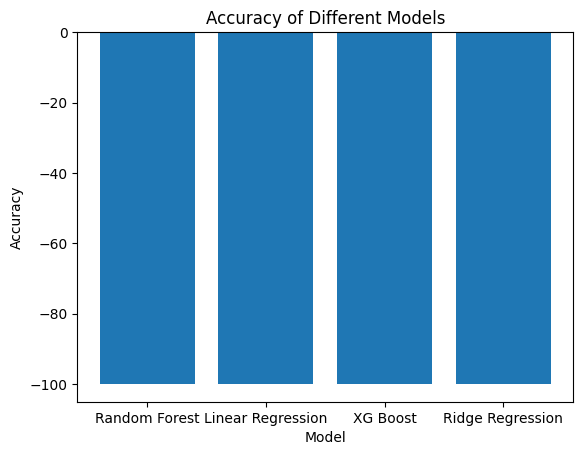

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Linear Regression', 'XG Boost', 'Ridge Regression']
accuracies = [100 - smape(y_test, rf_predictions), 100 - smape(y_test, lr_predictions), 100 - smape(y_test, y_pred), 100 - smape(y_test, ridge_predictions)]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()


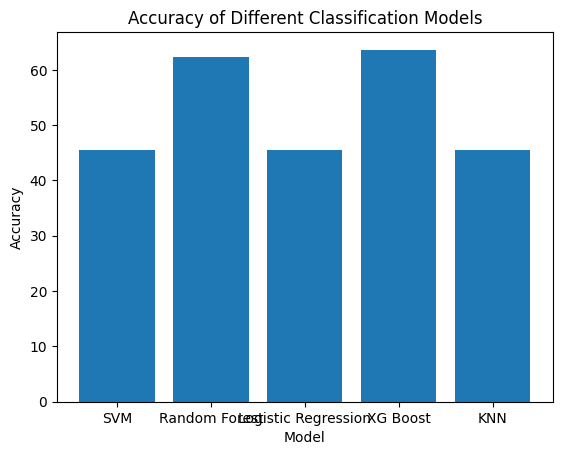

In [ ]:
models = ['SVM', 'Random Forest', 'Logistic Regression', 'XG Boost','KNN']
accuracies = [100 - smape(y2_test, svm_predictions), 100 - smape(y2_test, y2_pred_rf), 100 - smape(y2_test,y2_pred_lr), 100 - smape(y2_test,y2_pred_xg),100- smape(y2_test,y2_pred_knn)]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.show()


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 768
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   danceability          769 non-null    float64
 1   energy                769 non-null    float64
 2   key                   769 non-null    float64
 3   loudness              769 non-null    float64
 4   mode                  769 non-null    float64
 5   speechiness           769 non-null    float64
 6   acousticness          769 non-null    float64
 7   instrumentalness      769 non-null    float64
 8   liveness              769 non-null    float64
 9   valence               769 non-null    float64
 10  tempo                 769 non-null    float64
 11  duration_ms           769 non-null    float64
 12  time_signature        769 non-null    float64
 13  artistPopularity1     769 non-null    float64
 14  artistFollowers1      769 non-null    float64
 15  artist1_genre1        7